# Лабораторная работа №7.4
## Исследование поглощения вторичного космического излучения в веществе

In [17]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.interpolate as scpint

Загрузим данные

In [18]:
data = pd.read_csv("data.csv")

Добавим к данным систематическую ошибку по x.

In [19]:
data = data.join(pd.DataFrame({'xerr':[0.5 for i in range(data.shape[0])], 'yerr':[np.sqrt(data.values[i][1]) for i in range(data.shape[0])]}))
data.N1 = data.N1 - 105
data

,"d, см",N1,xerr,yerr
0,0.0,58,0.5,12.767145
1,1.8,22,0.5,11.269428
2,3.6,20,0.5,11.180340
3,5.4,2,0.5,10.344080
4,7.2,23,0.5,11.313708
5,9.0,14,0.5,10.908712
6,12.6,1,0.5,10.295630
7,16.2,9,0.5,10.677078


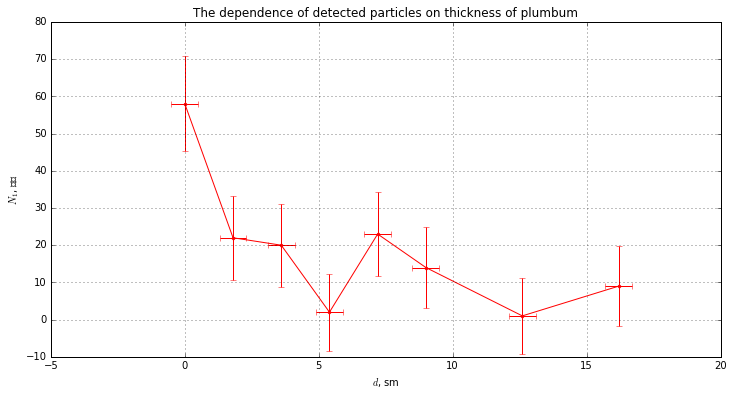

In [20]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

yData = data.values.T[1]
xData = data.values.T[0]
xerrData = data.values.T[2]
yerrData = data.values.T[3]

plt.errorbar(xData, yData, xerr=xerrData, yerr=yerrData, fmt='r.-', color='r')
plt.xlabel(u'$d$, sm')
plt.ylabel(u'$N_{1}$, шт')
plt.title(u'The dependence of detected particles on thickness of plumbum')
plt.grid(True)

plt.show()

Найдём верхнюю границу отношения интенсивностей мягкой и жесткой компонент космического излучения $\frac{I_{м}, I_{ж}}$

In [21]:
dataln = pd.DataFrame({'ln(d)':[np.log(xData[i]) for i in range(data.shape[0])], 'ln(N)' : [np.log(yData[i]) for i in range(data.shape[0])], 'xerr':[(xerrData[i]/xData[i]) for i in range(data.shape[0])], 'yerr':[(yerrData[i]/yData[i]) for i in range(data.shape[0])] })
dataln.values[0][1] = 0
dataln.values[0][2] = 0
dataln

,ln(N),ln(d),xerr,yerr
0,4.060443,0.000000,0.000000,0.220123
1,3.091042,0.587787,0.277778,0.512247
2,2.995732,1.280934,0.138889,0.559017
3,0.693147,1.686399,0.092593,5.172040
4,3.135494,1.974081,0.069444,0.491900
5,2.639057,2.197225,0.055556,0.779194
6,0.000000,2.533697,0.039683,10.295630
7,2.197225,2.785011,0.030864,1.186342


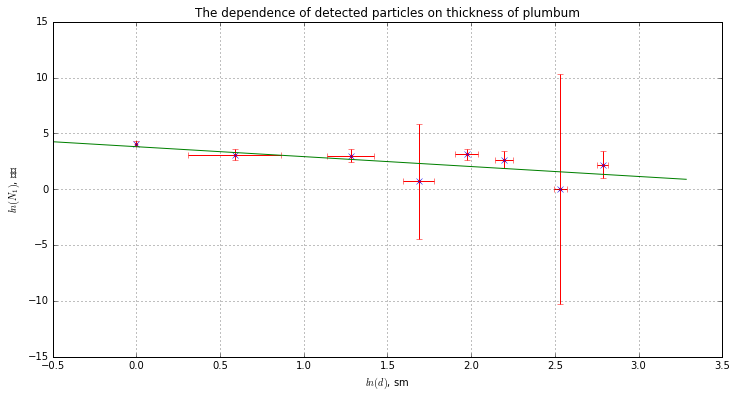

In [22]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

yData = dataln.values.T[0]
xData = dataln.values.T[1]
xerrData = dataln.values.T[2]
yerrData = dataln.values.T[3]

coef,cov = np.polyfit(xData, yData, 1, cov=True)
func = np.poly1d(coef)
kerr, berr = np.sqrt(np.diag(cov))[0], np.sqrt(np.diag(cov))[1]
k,b = coef[0], coef[1]

# calculate new x's and y's
x_new = np.linspace(xData[0]-0.5, xData[-1]+0.5, 50)
y_new = func(x_new)


plt.errorbar(xData, yData, xerr=xerrData, yerr=yerrData, fmt='r.', color='r')
plt.xlabel(u'$ln(d)$, sm')
plt.ylabel(u'$ln(N_{1})$, шт')
plt.title(u'The dependence of detected particles on thickness of plumbum')
plt.grid(True)

plt.plot(xData,yData,'x', x_new, y_new)
plt.show()

In [23]:
print str(round(k,2)) + " ± " + str(round(kerr,2))

-0.89 ± 0.55


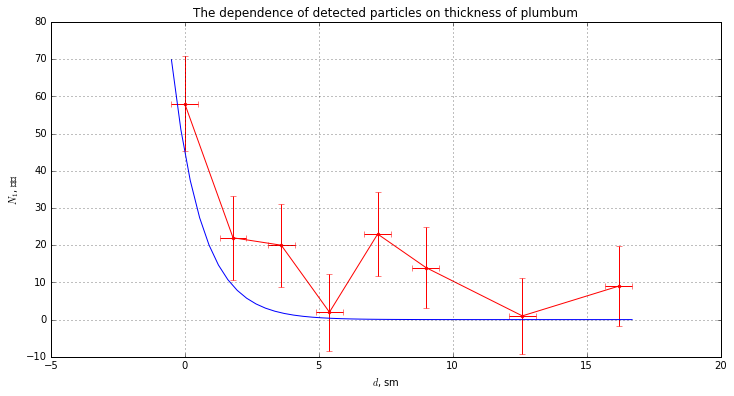

In [24]:


plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

yData = data.values.T[1]
xData = data.values.T[0]
xerrData = data.values.T[2]
yerrData = data.values.T[3]

plt.errorbar(xData, yData, xerr=xerrData, yerr=yerrData, fmt='r.-', color='r')
plt.xlabel(u'$d$, sm')
plt.ylabel(u'$N_{1}$, шт')
plt.title(u'The dependence of detected particles on thickness of plumbum')
plt.grid(True)

x_new = np.linspace(xData[0]-0.5, xData[-1]+0.5, 50)
plt.plot(x_new, np.exp(b)*np.exp(k*x_new))
plt.show()

In [16]:
round((data.values[0][1] - data.values[7][1])/data.values[7][1], 2)

5.44